In [1]:
%pylab inline

import sys
import numpy as np
import Nio
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from IPython.html.widgets import interact

sys.path.append('../')
from pytrack.detector import *

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


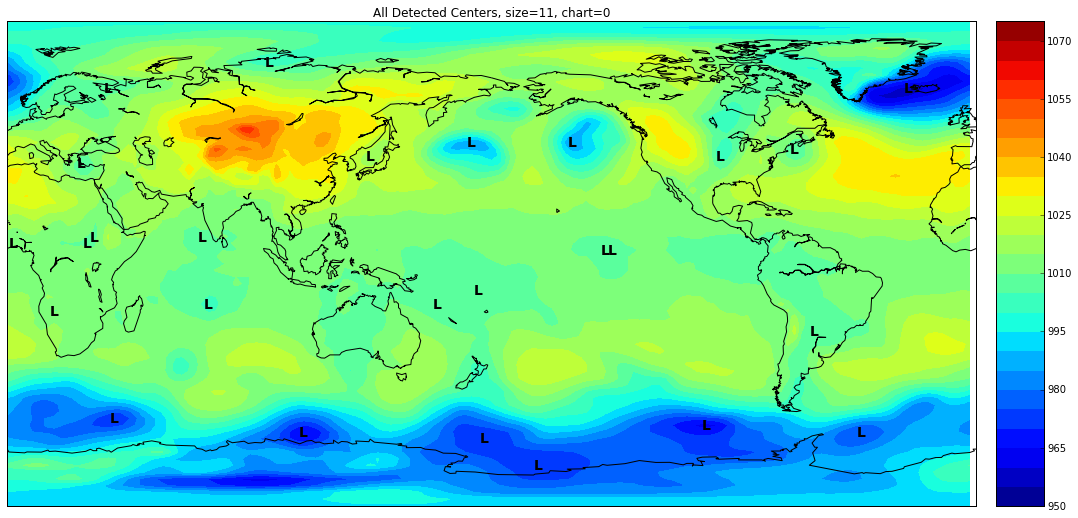

In [3]:
# Plot chart 0 only
chart = 0
size = 11

var, time, lat, lon = get_var_handle(filename="../slp.2012.nc")
lons, lats = np.meshgrid(lon[:], lat[:])

m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
x, y = m(lons, lats)

data = var[chart,:,:]
centers = detect_center_latlon(data, size=size)
center_indices = centers.nonzero()
# print(np.transpose(center_indices))

xcenter = x[center_indices]
ycenter = y[center_indices]

fig = plt.figure(figsize=(16,10))
ax = fig.add_axes([0.1,0.1,0.9,0.9])
m.drawcoastlines()

clevs = np.arange(950,1080.,5.)
cs = m.contourf(x, y, data/100, clevs)
cb = m.colorbar(cs)
for xi,yi in zip(xcenter, ycenter):
    plt.text(xi,yi,'L',fontsize=14,fontweight='bold',
                    ha='center',va='center',color='k')
plt.title('All Detected Centers, size=' + str(size) + ', chart=' + str(chart))
plt.show()

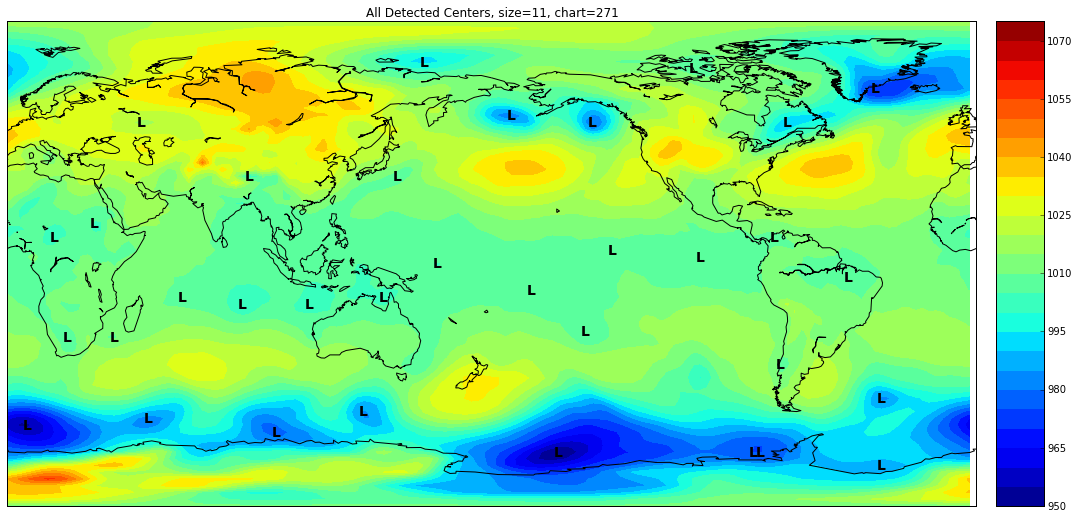

In [4]:
size=11

var, time, lat, lon = get_var_handle(filename="../slp.2012.nc")
lons, lats = np.meshgrid(lon[:], lat[:])

m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
x, y = m(lons, lats)

def pltchart(chart):
    data = var[chart,:,:]
    centers = detect_center_latlon(data, size=size)
    center_indices = centers.nonzero()
    # print(np.transpose(center_indices))
    
    xcenter = x[center_indices]
    ycenter = y[center_indices]
    
    fig = plt.figure(figsize=(16,10))
    ax = fig.add_axes([0.1,0.1,0.9,0.9])
    m.drawcoastlines()
    
    clevs = np.arange(950,1080.,5.)
    cs = m.contourf(x, y, data/100, clevs)
    cb = m.colorbar(cs)
    for xi,yi in zip(xcenter, ycenter):
        plt.text(xi,yi,'L',fontsize=14,fontweight='bold',
                        ha='center',va='center',color='k')
    plt.title('All Detected Centers, size=' + str(size) + ', chart=' + str(chart))
    plt.show()

chart = (0, len(time))
    
interact(pltchart, chart=chart)